2021-04-10-Logistic regression  / ЛОГИСТИКАЛЫҚ РЕГРЕССИЯ 

In [32]:
# КЕРЕКТІ КІАПХАНАЛАР : 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

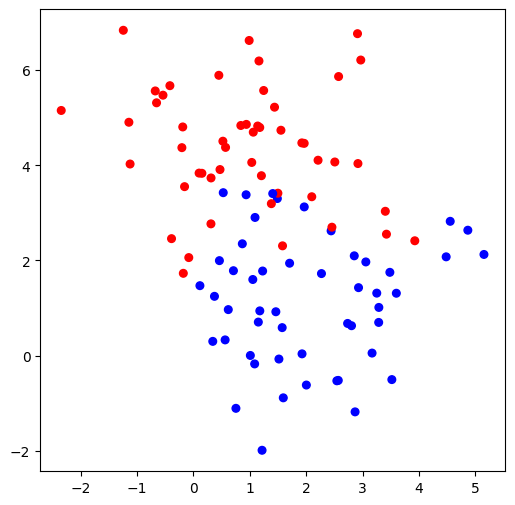

[1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1]


In [33]:
# Дерекетерді Генерациялау 
X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.3, random_state=0)
plt.figure(figsize=(6,6))


#y_D2
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=30, cmap=ListedColormap(['#FF0000','#0000FF']))
plt.show()
print(y_D2)

In [34]:
# Логистикалық функция (өзгеріссіз)
def logisticFunction(X, theta):
    h = 1 / (1 + np.exp(-np.dot(X, theta)))
    return h

# Сынақ мәндерімен логистикалық функцияны тексеру
theta = np.array([0.5, 0.5])
X = np.array([1, 1])
print(logisticFunction(X, theta))

0.7310585786300049


In [35]:
# Логистикалық регрессияны оқыту функциясы
def logisticRegressionByNumpy(X,y):
    m=y.size
    on=np.ones([m,1]) # Бос мүшені қосу үшін бірліктер бағанын қосамыз
    X = np.concatenate((on, X), axis=1)  # X-пен біріктіреміз
    
    theta = np.array([0.1, 0.5, 0.7])  # Параметрлердің бастапқы мәні
    h = logisticFunction(X, theta)  # Алғашқы болжамды есептеу
    alpha=0.05 # оқыту жылдамдығы 
    iter=50 # итерация саны
    
# Параметрлерді жаңарту үшін Градиенттік түсудің процесі
    for i in range(iter):
        theta = theta - alpha * (1 / m) * np.dot(X.T, (h - y))
        h = logisticFunction(X, theta)
    
    h = logisticFunction(X, theta)
    return theta, h

In [36]:
# модельді оқытамыз
theta, h = logisticRegressionByNumpy(X_D2, y_D2)
print('Result:', theta, h)

Result: [ 0.09018112  0.60000211 -0.53286348] [0.832925   0.56298191 0.04176018 0.28136135 0.82522072 0.45264801
 0.18968971 0.78906987 0.15315205 0.66730448 0.11951145 0.67323964
 0.10607546 0.08619029 0.52001201 0.88590831 0.92214726 0.13092142
 0.53453305 0.46777649 0.14697979 0.13018719 0.30986974 0.04108227
 0.7977039  0.12107093 0.69774772 0.05487245 0.1820805  0.5396225
 0.86991489 0.14491775 0.48686698 0.87114138 0.31530484 0.36047651
 0.57370475 0.40249357 0.53164302 0.34920223 0.18975827 0.19159618
 0.01339184 0.30381956 0.19522408 0.63067624 0.83528245 0.82073826
 0.03880886 0.05848719 0.773438   0.41376797 0.14555847 0.13837196
 0.76142371 0.14223358 0.68677822 0.61717839 0.79290017 0.9200096
 0.47015341 0.31616212 0.0398098  0.74784421 0.07499071 0.29316054
 0.13060412 0.62628145 0.77709819 0.39436304 0.3139879  0.73888254
 0.84211868 0.24267993 0.25811149 0.13460053 0.39320633 0.66489028
 0.15297548 0.12607879 0.24050925 0.231356   0.03626754 0.24823249
 0.23183747 0.0701

In [37]:
# жалғасы
print('y_D2 =', y_D2)
print('\nh =', h)

y_D2 = [1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1]

h = [0.832925   0.56298191 0.04176018 0.28136135 0.82522072 0.45264801
 0.18968971 0.78906987 0.15315205 0.66730448 0.11951145 0.67323964
 0.10607546 0.08619029 0.52001201 0.88590831 0.92214726 0.13092142
 0.53453305 0.46777649 0.14697979 0.13018719 0.30986974 0.04108227
 0.7977039  0.12107093 0.69774772 0.05487245 0.1820805  0.5396225
 0.86991489 0.14491775 0.48686698 0.87114138 0.31530484 0.36047651
 0.57370475 0.40249357 0.53164302 0.34920223 0.18975827 0.19159618
 0.01339184 0.30381956 0.19522408 0.63067624 0.83528245 0.82073826
 0.03880886 0.05848719 0.773438   0.41376797 0.14555847 0.13837196
 0.76142371 0.14223358 0.68677822 0.61717839 0.79290017 0.9200096
 0.47015341 0.31616212 0.0398098  0.74784421 0.07499071 0.29316054
 0.13060412 0.62628145 0.77709819 0.39436304 0.31

In [38]:
# Бір мәнді болжауға арналған Функция (өзгеріссіз)
def logRegPredictValue(h,treshold=0.5):
    out=0
    if h>=treshold:
        out=1
    return out # Бір мән үшін болжау
    
predicted=logRegPredictValue(h[99]) #,0.5)  # 99-шы мән үшін болжам
print('predicted class is', predicted)

predicted class is 0


Task 1 Classify all examples

In [39]:
# Барлық мәндерді болжау үшін функцияны іске асыру
def logRegPredictMatrix(h,treshold=0.5):
    ### Start your code here
# Мұнда біз барлық ықтималдықтарды шекке негізделген сыныптарға түрлендіреміз
    out = (h >= treshold).astype(int)
    #end your code    
    return out # Болжау векторын қайтару


# Барлық мысалдар үшін сыныптарды болжау
predicted=logRegPredictMatrix(h)

In [40]:
# Модельді метрикамен бағалау
matrix = confusion_matrix(y_D2, predicted)
print('Confusion Matrix on the train set \n', matrix)

# дәлдікті алу
print('Accuracy: {:.2f}'.format(accuracy_score(y_D2, predicted)))

# классификация есебі
print('Classification report\n', classification_report(y_D2, predicted, target_names=['not 1', '1']))

Confusion Matrix on the train set 
 [[46  4]
 [14 36]]
Accuracy: 0.82
Classification report
               precision    recall  f1-score   support

       not 1       0.77      0.92      0.84        50
           1       0.90      0.72      0.80        50

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100

